In [15]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   project       1127 non-null   object
 1   language      1127 non-null   object
 2   commits       1127 non-null   int64 
 3   insertions    1127 non-null   int64 
 4   age           1127 non-null   int64 
 5   bugs          1127 non-null   int64 
 6   project_type  1127 non-null   object
 7   devs          1127 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 70.6+ KB


### Numerical data distribution

In [4]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64')]

In [30]:
df_num = df.select_dtypes(include = ['int64'])
df_num.head()

,commits,insertions,age,bugs,devs
0,629,9180,774,128,21
1,75,39240,509,29,10
2,196,5624,362,74,24
3,952,50099,962,403,128
4,213,14657,192,68,5


array([[<Axes: title={'center': 'commits'}>,
        <Axes: title={'center': 'insertions'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'bugs'}>],
       [<Axes: title={'center': 'devs'}>, <Axes: >]], dtype=object)

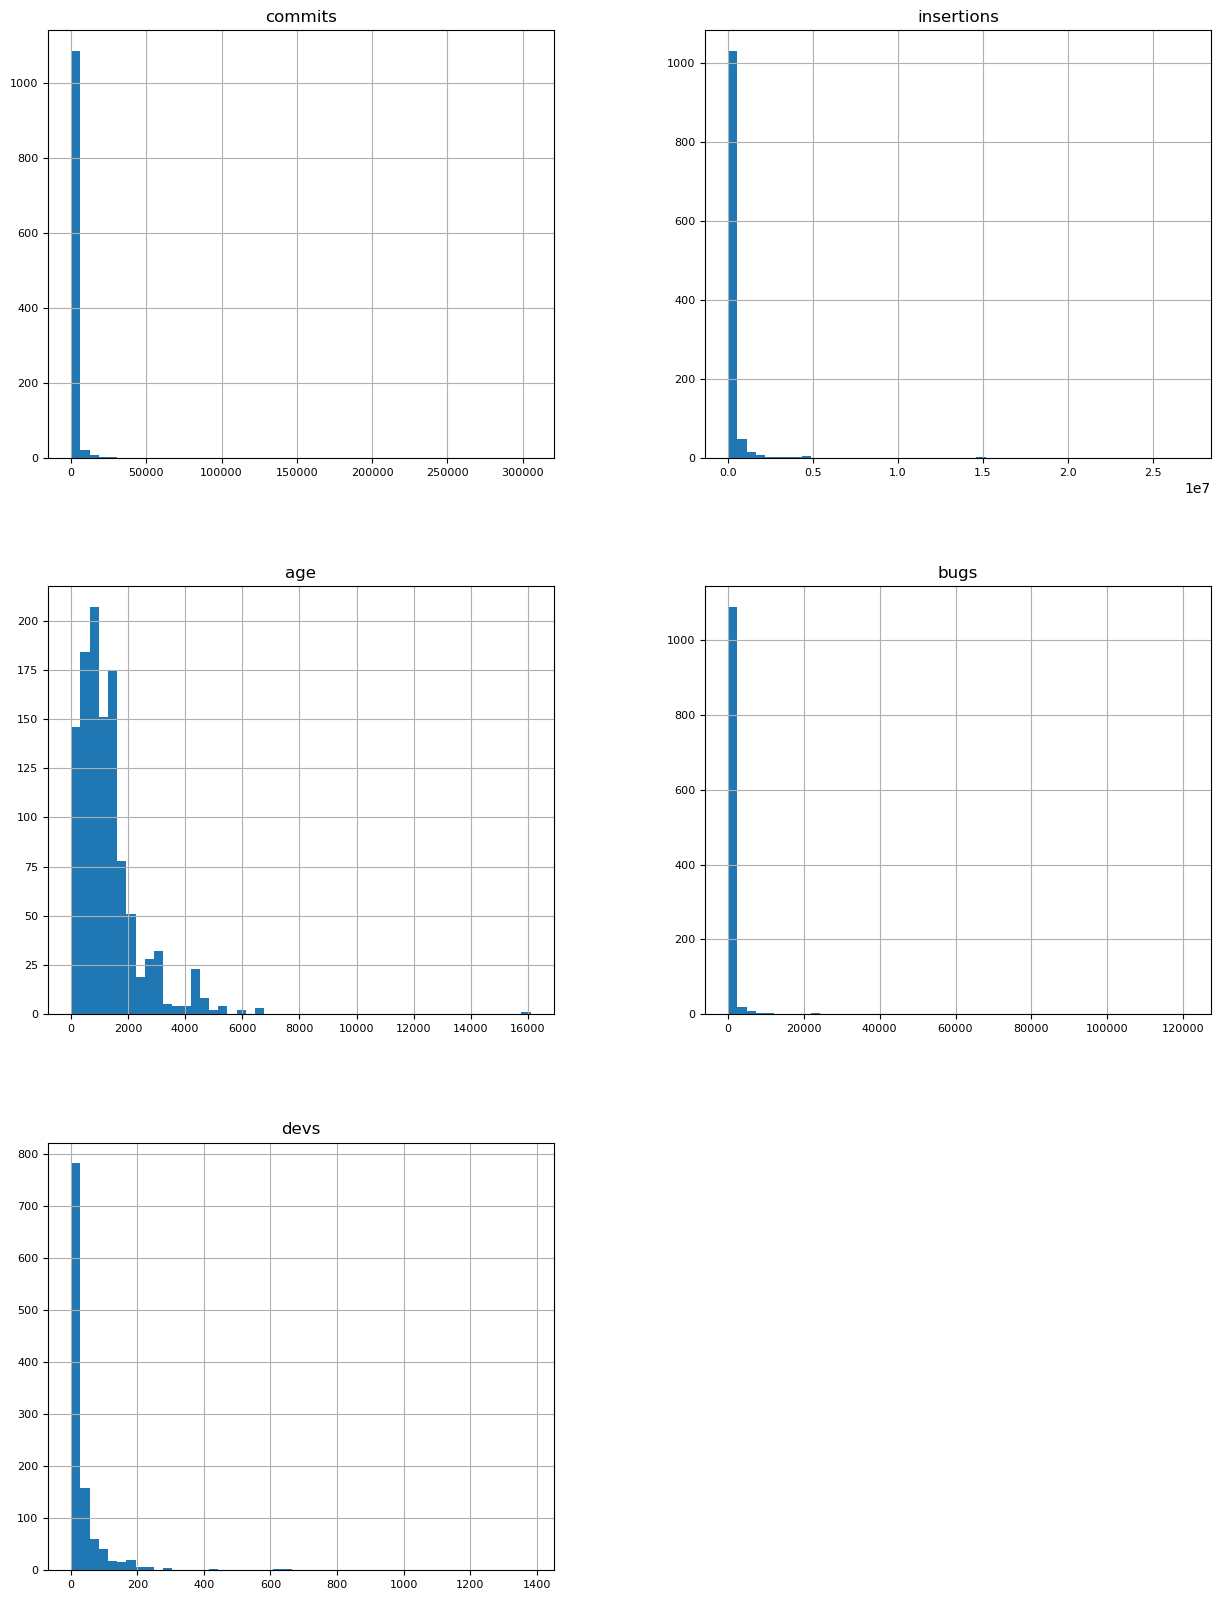

In [6]:
df_num.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Categorical data distribution

In [7]:
df_cat = df.select_dtypes(include = ['O'])
df_cat.head()

,project,language,project_type
0,4clojure,Clojure,Application
1,4clojure,Javascript,Application
2,AFIncrementalStore,Objective-C,Library
3,AFNetworking,Objective-C,Framework
4,ActionBar-PullToRefresh,Java,Library


In [36]:
for column in df_cat.columns:
  print('===========================')
  print(f'Column name: {column}')
  print('===========================')
  print(f'# of unique values: {len(df_cat[column].value_counts())}')
  print(f'# of average counts: {df_cat[column].value_counts().mean()}')
  print()

Column name: project
# of unique values: 729
# of average counts: 1.5459533607681757

Column name: language
# of unique values: 17
# of average counts: 66.29411764705883

Column name: project_type
# of unique values: 7
# of average counts: 161.0



### Check for correlation between feature variables

In [31]:
df_temp = df_num.drop(["bugs"], axis=1)
for column in df_num.columns:
    if column != 'bugs':
        df_num_corr = df_temp.corr()[column] 
        golden_features_list = df_num_corr[(abs(df_num_corr) > 0.2)&(abs(df_num_corr) != 1)].sort_values(ascending=False) # set (!= 1) to exclude bugs 
        if len(golden_features_list) > 0:
            print("There is {} strongly correlated values with {}:\n{}".format(len(golden_features_list), column, golden_features_list))

There is 2 strongly correlated values with commits:
insertions    0.720730
devs          0.351487
Name: commits, dtype: float64
There is 3 strongly correlated values with insertions:
commits    0.720730
devs       0.306853
age        0.203242
Name: insertions, dtype: float64
There is 2 strongly correlated values with age:
devs          0.225352
insertions    0.203242
Name: age, dtype: float64
There is 3 strongly correlated values with devs:
commits       0.351487
insertions    0.306853
age           0.225352
Name: devs, dtype: float64


### Check for correlation to the target variable

In [11]:
# perform one-hot encodings on project and project_type
df_encoded = pd.get_dummies(df, columns=['project', 'language', 'project_type'], dtype=int)

# update df_num
df_num = df_encoded.select_dtypes(include = ['float64', 'int64'])

In [14]:
df_num_corr = df_num.corr()['bugs'] 
golden_features_list = df_num_corr[(abs(df_num_corr) > 0.2)&(abs(df_num_corr) != 1)].sort_values(ascending=False) # set (!= 1) to exclude bugs 
print("There is {} strongly correlated values with # of bugs:\n{}".format(len(golden_features_list), golden_features_list))

There is 4 strongly correlated values with # of bugs:
commits          0.993864
insertions       0.724185
project_linux    0.533954
devs             0.343760
Name: bugs, dtype: float64
